In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 11s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


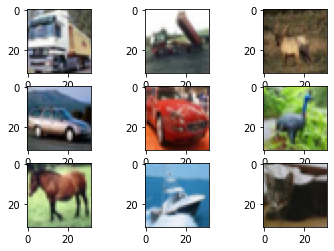

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i], cmap="binary")
 
plt.show()

In [ ]:
def getTrainData():
  x_data_train = []
  y_data_train = []
  for i in range(len(x_train)):
    if(y_train[i] == 2 or y_train[i] == 3 or y_train[i] == 6):  #bird cat frog
      x_data_train.append(np.resize(x_train[i], (24,24,3)).reshape(-1))
      y_data_train.append(np.resize(y_train[i], (24,24,3)).reshape(-1))

  return np.array(x_data_train), np.array(y_data_train)

def getTestData():
  x_data_test = []
  y_data_test = []
  for i in range(len(x_test)):
    if(y_test[i] == 2 or y_test[i] == 3 or y_test[i] == 6):
      x_data_test.append(np.resize(x_test[i], (24,24,3)).reshape(-1))
      y_data_test.append(np.resize(y_test[i], (24,24,3)).reshape(-1))
  
  return np.array(x_data_test), np.array(y_data_test)

x_train, y_train = getTrainData()
x_test, y_test = getTestData()

In [ ]:
print(x_train[0].shape)

(1728,)


In [ ]:
import pandas as pd

learning_rate = 0.1
iterations = 100
N = y_train.size
 
# Input features
input_size = 1728
 
# Hidden layers 
hidden_size = 2
 
# Output layer
output_size = 1728
 
results = pd.DataFrame(columns=["mse", "accuracy"])


In [ ]:
np.random.seed(10)
 
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
 
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
     
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
W1.shape

(1728, 2)

In [ ]:
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(x_train, W1) #скалярное произведение двух массивов
    A1 = sigmoid(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
     
     
    # Подсчёт ошибки
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
     
    # Обратное распространение
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
     
    # Коррекция весов
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

    print(f"Iteration: {itr}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

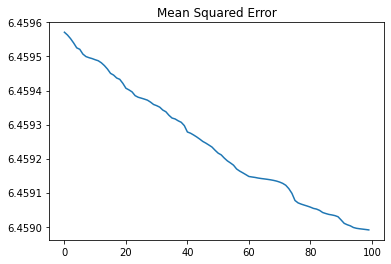

In [ ]:
results.mse.plot(title="Mean Squared Error")

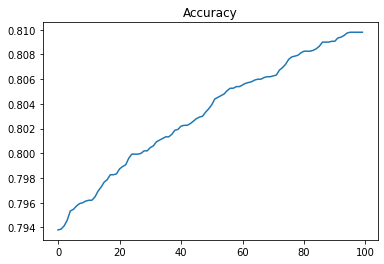

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)
 
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
 
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy: 0.8176666666666667
